<a href="https://colab.research.google.com/github/rozanalias/rozanalias/blob/main/PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import t

**Taken from Stat Labs by Nolan and Speed, originally from the Child Health and Development Studies conducted at the Oakland, CA, Kaiser Foundation Hospital. The variables are**

---
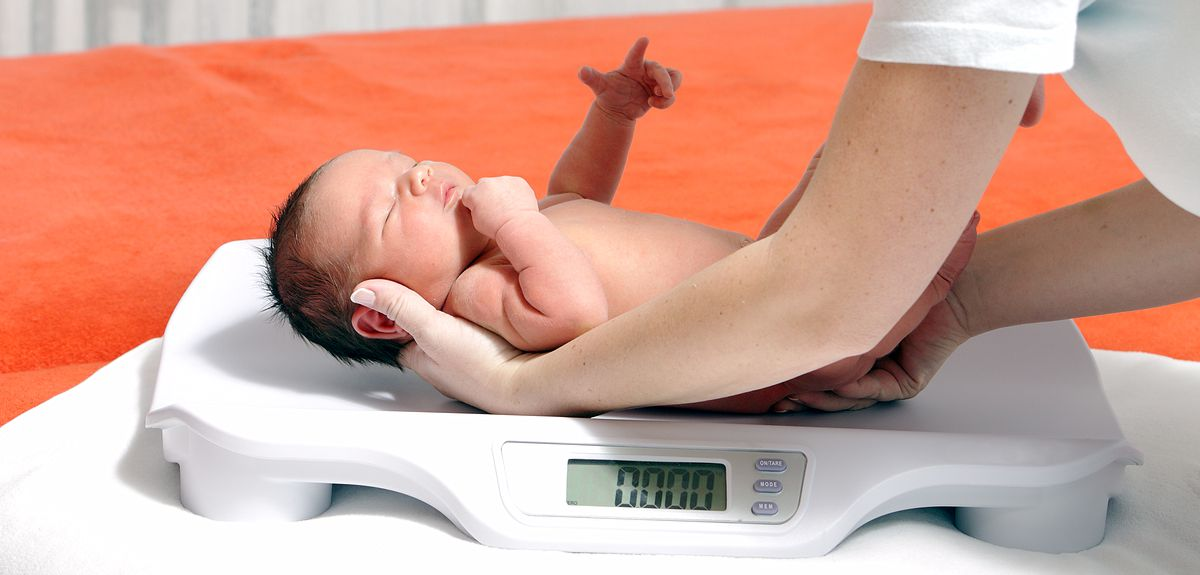
---


### Introduction


when it comes to a mother giving birth in most cases its the best thing a mother can witness. there are a lot of features that affects a babies weight and health. for example  the mothers weight during her pregnancy, the mother age , the mothers height and if the mother smokes during her pregnancy or not.

Previous studies have shown that variables such as smoking status and prior premature labors can have a significant impact on a newborn's overall health and weight, and we wanted to confirm these correlations for ourselves .
Taken from Stat Labs by Nolan and Speed, originally from the Child Health and Development Studies conducted at the Oakland, CA, Kaiser Foundation Hospital.

bwt: baby's weight in ounces at birth

1.   List item


*   bwt: baby's weight in ounces at birth
*   gestation: duration of pregnancy in days
*  parity: parity indicator (first born = 1, later birth = 0)
*  age: mother's age in years
*  height: mother's height in inches
*  weight: mother's weight in pounds (during pregnancy)
*  smoke: indicator for whether mother smokes (1=yes, 0=no)






In [ ]:
df =pd.read_csv("http://people.reed.edu/~jones/141/Bwt.dat")
df.head()


,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


## **data wrangling**

In [ ]:
df.isnull().sum()

bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [ ]:
df['bwt'] = df['bwt'] *0.0625


In [ ]:
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,7.5000,284,0,27,62,100,0
1,7.0625,282,0,33,64,135,0
2,8.0000,279,0,28,64,115,1
3,6.7500,282,0,23,67,125,1
4,8.5000,286,0,25,62,93,0


In [ ]:
df.isnull().sum()

bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64



> hypothesis tests to compare the means of two independent populations.
---We wish to determine if there is a relationship between age and brain weight in healthy human adults.



In this case, we wish to test the null hypothesis that birthweight for non-smokers and smoker mothers have the same mean  vs. the alternative hypothesis that birthweight for non-smokers and smoker mothers have different birthweights mean.


$H_0: \mu_{smoker} = \mu_{not smoker}$

$H_a: \mu_{smoker} \neq \mu_{notsmoker}$

I will use the two sample t-test function to test for a statistically significant difference at the alpha = 0.05 level.

In [ ]:
st.ttest_ind(df['bwt'], df['weight'])

Ttest_indResult(statistic=-199.6699622699862, pvalue=0.0)

In [ ]:
import scipy.stats as st 

Smoker = df[df['smoke'] == 1]
Not_Smoker = df[df['smoke'] == 0]


st.ttest_ind(Smoker['bwt'], Not_Smoker['bwt'])

Ttest_indResult(statistic=-8.718755502379533, pvalue=9.461067881089321e-18)

In [ ]:
print(Smoker['bwt'].mean())
print(Not_Smoker['bwt'].mean())

7.11369825708061
7.692832167832168


**The p-value is smaller than 0.05 . We reject Ho at the alpha = 0.05 level and conclude that there is a difference in the mean birthweight between mothers that smoke and the mothers doesn't.**

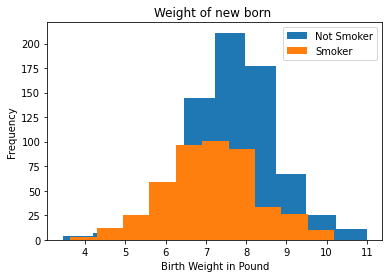

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(Not_Smoker['bwt'], label= 'Not Smoker')
ax.hist(Smoker['bwt'], label= 'Smoker')


ax.set_xlabel('Birth Weight in Pound') 
ax.set_ylabel('Frequency') 
ax.set_title('Weight of new born ') 
ax.legend()

In [ ]:
crosstab = pd.crosstab(index= df['smoke'], columns= df['parity'])
crosstab

parity,0,1
smoke,,
0,525,190
1,341,118


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


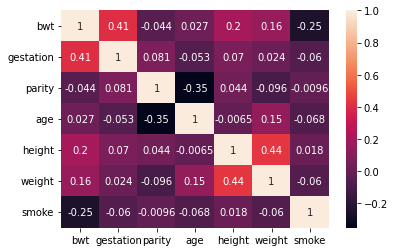

In [ ]:
from statsmodels.formula.api import ols
#sns.lmplot(x = 'weight', y = 'bwt', data= df, ci= None)
#module = ols('bwt~ age', data = df).fit()
#module.params

#plt.figure(figsize = (12,12 ))
sns.heatmap(df.corr(), annot= True)

There are other factors known to be associated with birthweight. The length of gestation is a major determinant of birthweight, and physiological factors such as the mother's weight, height, age and parity may also be related to birthweight

In [ ]:
import numpy as np
from scipy import stats

df.loc[(df['bwt'] < 5.5), 'lowbirthwt'] = 0
df.loc[(df['bwt'] >= 5.5), 'lowbirthwt'] = 1
df.head()

,bwt,gestation,parity,age,height,weight,smoke,lowbirth,lowbirthwt
0,7.5000,284,0,27,62,100,0,1.0,1.0
1,7.0625,282,0,33,64,135,0,1.0,1.0
2,8.0000,279,0,28,64,115,1,1.0,1.0
3,6.7500,282,0,23,67,125,1,1.0,1.0
4,8.5000,286,0,25,62,93,0,1.0,1.0


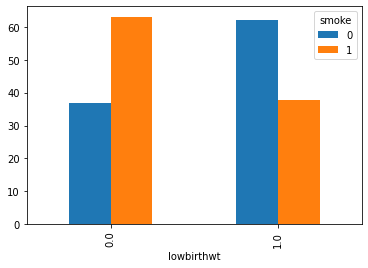

In [ ]:
df_crosstab = pd.crosstab(df['lowbirthwt'], df['smoke'], normalize= 'index')*100
df_crosstab.plot(kind='bar')

In [ ]:
g, p, dof, expct = chi2_contingency(pd.crosstab(df['lowbirthwt'], df['smoke']))
p

0.00023567355892367602

In [ ]:
chi2_contingency(pd.crosstab(df['lowbirthwt'], df['parity']))


(0.20143665536298125,
 0.6535637097238836,
 1,
 array([[ 42.04599659,  14.95400341],
        [823.95400341, 293.04599659]]))

In [ ]:
Lowbirthwt = df['lowbirthwt'].value_counts(normalize=True)*100
Lowbirthwt = pd.DataFrame(Lowbirthwt)
Lowbirthwt = Lowbirthwt.rename(index={0 : 'low birth wight', 1 : 'good birth wight'  })
Lowbirthwt 

,lowbirthwt
good birth wight,95.144804
low birth wight,4.855196


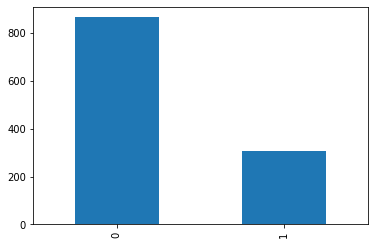

In [ ]:
df['parity'].value_counts().plot(kind = 'bar')